<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Character Generator Model (Problem 2)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [ ]:
# Import the Required Packages
# Enter your code here:
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.4.0


### GitHub + Colab

In [ ]:
#run for GitHub Colab
!git clone "https://github.com/OldManSteve/DL_Assg2.git"


Cloning into 'DL_Assg2'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 15), reused 42 (delta 9), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [ ]:
#GitHub Colab directory
# Directories for files
holmes_file = '/content/DL_Assg2/holmes.txt'

In [ ]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/DL_Assg2_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [ ]:
# read in the text file, transforming everything to lower case
text = open(holmes_file).read().lower()
print('The original text has ' + str(len(text)) + ' characters.\n')

The original text has 562422 characters.



### 1.2 Data Processing


In [ ]:
### print out the first 1000 characters of the raw text to get a sense of what characters to remove
text[:2000]

"\ufeffthe adventures of sherlock holmes by sir arthur conan doyle\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. the adventure of the speckled band\n  ix. the adventure of the engineer's thumb\n   x. the adventure of the noble bachelor\n  xi. the adventure of the beryl coronet\n xii. the adventure of the copper beeches\n\n\nadventure i. a scandal in bohemia\n\ni.\n\nto sherlock holmes she is always the woman. i have seldom heard\nhim mention her under any other name. in his eyes she eclipses\nand predominates the whole of her sex. it was not that he felt\nany emotion akin to love for irene adler. all emotions, and that\none particularly, were abhorrent to his cold, precise but\nadmirably balanced mind. he was, i take it, the most perfect\nreasoning and observing machine that the world has seen, but as

In [ ]:
# remove all '\n' and '\r' from text
text = text.replace('\n','') 
text = text.replace('\r','')

print(text[:2000])

﻿the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [ ]:
# create a function 'clean_text' to clean text so that only the following letters and punctation remain
def clean_text(text):
    punctuation = ['!', ',', '.', ':', ';', '?', '-', "'",' ']
    letters='abcdefghijklmnopqrstuvwxyz'
    
    # Enter your code here:
    clean_text=''

    for i in text:
      if i in punctuation or i in letters:
        clean_text+=i

    return clean_text

In [ ]:
# clean data using clean_text function
text = clean_text(text)
text[:2000]

"the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [ ]:
# count the number of unique characters in the text
chars = sorted(list(set(text)))

# print some of the text, as well as statistics
print ("This document has " +  str(len(text)) + " total number of characters.")
print ("This document has " +  str(len(chars)) + " unique characters.")

This document has 544340 total number of characters.
This document has 35 unique characters.


In [ ]:
# create a function 'generate_text_io' to generate text inputs based on window_size and the corresponding labels
def generate_text_io(text, window_size):
    inputs = [] # store inputs
    labels = [] # stores label
    
    # Enter your code here:
    for i in range(0, len(text)-window_size):
      inputs.append(text[i:i+window_size])
      labels.append(text[i+window_size])
    
    print("Num of Sequences: ",len(inputs))
    print(inputs)
    return inputs, labels

In [ ]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [ ]:
import numpy as np

# create a function 'encode_io_pairs' to perform one-hot encoding of inputs and labels
def encode_io_pairs(text,window_size): # window_size determines # of characters in each input
    
    # Enter your code here:
    inputs, labels = generate_text_io(text, window_size)


    # Next, one-hot encode the characters into binary arrays.
    print('Vectorization...')
    x = np.zeros((len(inputs), window_size, len(chars)), dtype=np.bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            x[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[labels[i]]] = 1

    return x, y

In [ ]:
# perform one-hot encoding of inputs and labels
window_size = 100
X, y = encode_io_pairs(text, window_size)

Num of Sequences:  544240


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 1.3 Splitting Dataset into Inputs (X) and Labels (y)

In [ ]:
# Note: You may choose to perform this step before encoding the data (step 1.2).
# Enter your code here:
print (y.shape)
print (X.shape)

(544240, 35)
(544240, 100, 35)


## Step 2 – Develop a Character Generator Model

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model TESTING

In [ ]:
!git clone https://github.com/minimaxir/char-embeddings.git

Cloning into 'char-embeddings'...
remote: Enumerating objects: 152, done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (152/152), 10.95 MiB | 6.04 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [ ]:
max_words = 10000
embedding_dim = 300

glove_dir = '/content/char-embeddings/'

embedding_vectors = {}
with open(glove_dir + 'glove.840B.300d-char.txt') as f:
    for line in f:
        line_split = line.strip().split(" ")
        vec = np.array(line_split[1:], dtype=float)
        char = line_split[0]
        embedding_vectors[char] = vec

embedding_matrix = np.zeros((len(chars), 300))
#embedding_matrix = np.random.uniform(-1, 1, (len(chars), 300))
for char, i in chars_to_indices.items():
    #print ("{}, {}".format(char, i))
    embedding_vector = embedding_vectors.get(char)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, SGD


model = keras.models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_shape=(window_size, len(chars))))
model.add(layers.Flatten())
#model.add(layers.Dense(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 35, 300)      3000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 1050000)           0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               134400128 
_________________________________________________________________
dense_8 (Dense)              (None, 35)                4515      
Total params: 137,404,643
Trainable params: 137,404,643
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['acc'])

history = model.fit(X, y,
                    epochs=10,
                    batch_size=256) 

Epoch 1/10
2126/2126 [==============================] - 1623s 763ms/step - loss: 2.4436 - acc: 0.3004
Epoch 2/10
2126/2126 [==============================] - 1625s 764ms/step - loss: 2.1061 - acc: 0.3839
Epoch 3/10
2126/2126 [==============================] - 1625s 765ms/step - loss: 1.9910 - acc: 0.4125
Epoch 4/10
2126/2126 [==============================] - 1627s 765ms/step - loss: 1.9085 - acc: 0.4345
Epoch 5/10
2126/2126 [==============================] - 1625s 764ms/step - loss: 1.8396 - acc: 0.4539
Epoch 6/10
2126/2126 [==============================] - 1622s 763ms/step - loss: 1.7822 - acc: 0.4697
Epoch 7/10
2126/2126 [==============================] - 1622s 763ms/step - loss: 1.7336 - acc: 0.4830
Epoch 8/10
2126/2126 [==============================] - 1626s 765ms/step - loss: 1.6923 - acc: 0.4950
Epoch 9/10
2126/2126 [==============================] - 1625s 764ms/step - loss: 1.6576 - acc: 0.5048
Epoch 10/10
2126/2126 [==============================] - 1617s 761ms/step - loss: 

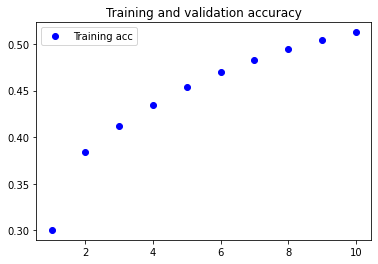

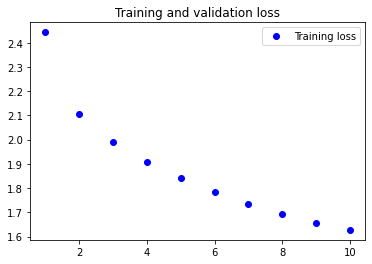

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_gLove300d_1_1.h5')

### Model #1 (Replicate as necessary for other models)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               83968     
_________________________________________________________________
dense (Dense)                (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=30,
                    batch_size=128) 

Epoch 1/30
  92/4252 [..............................] - ETA: 19:05 - loss: 2.7630 - acc: 0.2216

KeyboardInterrupt: ignored

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('chgen_model_1.h5')

### Model #2

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential()
model.add(layers.Embbeding(max_words, ))
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               83968     
_________________________________________________________________
dense (Dense)                (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=30,
                    batch_size=128) 

Epoch 1/30
  92/4252 [..............................] - ETA: 19:05 - loss: 2.7630 - acc: 0.2216

KeyboardInterrupt: ignored

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('chgen_model_1.h5')

## Step Evaluation [MODEL TESTING]

In [ ]:
from tensorflow.keras import models

#model.load_weights('chgen_model_best.h5')

model = models.load_model(model_path+'chgen_model_gLove300d_1.h5')

In [ ]:
# takes the user input

#Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.

#text_input = np.array([input()])
text_input = clean_text(input().lower())

i love going to the park, especially when it is windy or sunny. every satruday i go to the park after buying ice cream.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 5

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  114
['i lov', ' love', 'love ', 'ove g', 've go', 'e goi', ' goin', 'going', 'oing ', 'ing t', 'ng to', 'g to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park,', 'ark, ', 'rk, e', 'k, es', ', esp', ' espe', 'espec', 'speci', 'pecia', 'ecial', 'ciall', 'ially', 'ally ', 'lly w', 'ly wh', 'y whe', ' when', 'when ', 'hen i', 'en it', 'n it ', ' it i', 'it is', 't is ', ' is w', 'is wi', 's win', ' wind', 'windy', 'indy ', 'ndy o', 'dy or', 'y or ', ' or s', 'or su', 'r sun', ' sunn', 'sunny', 'unny.', 'nny. ', 'ny. e', 'y. ev', '. eve', ' ever', 'every', 'very ', 'ery s', 'ry sa', 'y sat', ' satr', 'satru', 'atrud', 'truda', 'ruday', 'uday ', 'day i', 'ay i ', 'y i g', ' i go', 'i go ', ' go t', 'go to', 'o to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park ', 'ark a', 'rk af', 'k aft', ' afte', 'after', 'fter ', 'ter b', 'er bu', 'r buy', ' buyi', 'buyin', 'uying', 'ying ', 'ing i', 'ng ic', 'g ice', ' ic

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1


ValueError: ignored

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

## Step 3 – Use the Best Model to make prediction

In [ ]:
from tensorflow.keras import models

model = models.load_model(model_path+ 'chgen_model_best.h5')

In [ ]:
# takes the user input

#text_input = np.array([input()])
text_input = clean_text(input().lower())

In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 5

X, y = encode_io_pairs(text_input, new_window_size)

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  
#sequences = tokenizer.texts_to_sequences(text_input)
#data = pad_sequences(sequences, maxlen=max_len)

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - window_size - 1)
    generated_text = text_input[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    #for temperature in [0.2, 0.5, 1.0, 1.2]:
        #print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, window_size, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, chars_to_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
        print()


In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()